In [7]:
#Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#get_ipython().magic('matplotlib inline')

#Useing pandas to read loan_data.csv as a dataframe called loans.
loans = pd.read_csv('loan_data.csv')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries,

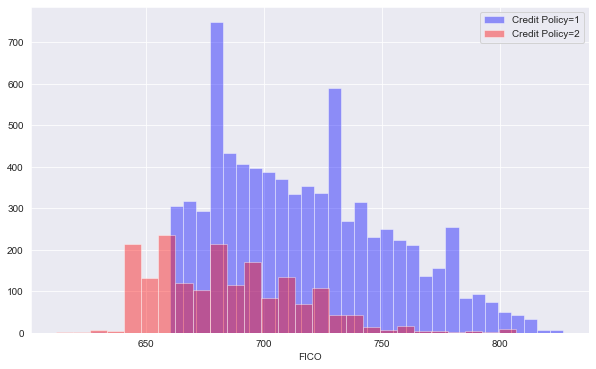

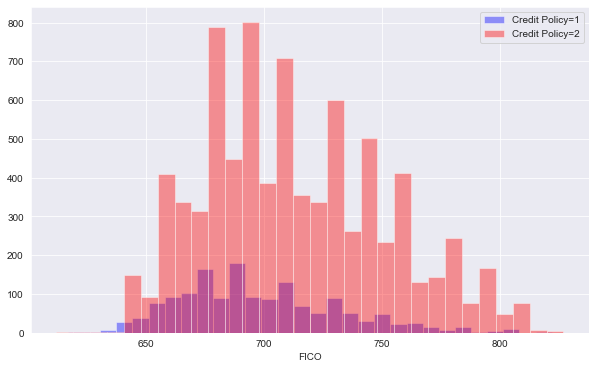

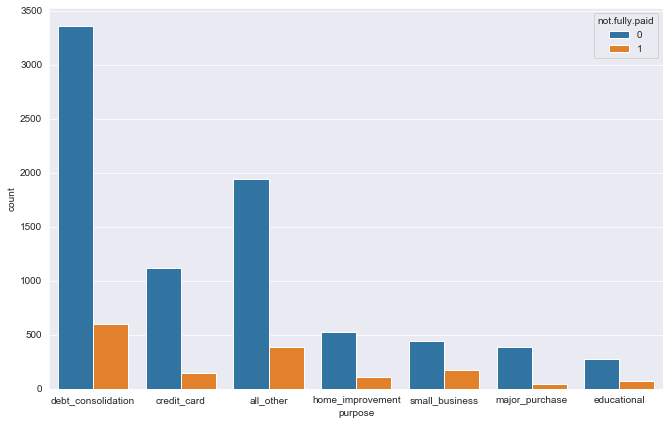

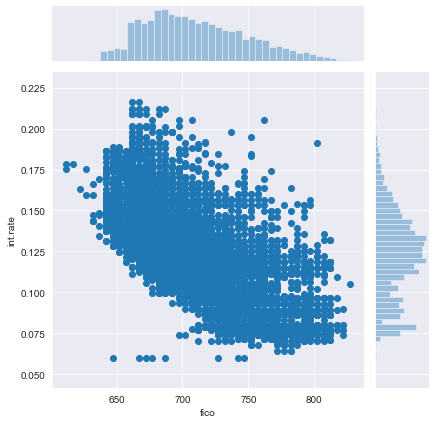

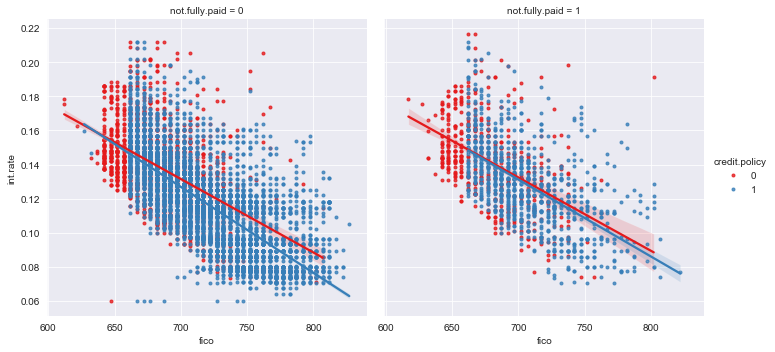

In [8]:



#Checking out the info(), head(), and describe() methods on loans.
loans.info()

loans.describe()

loans.head()


#Exploratory Data Analysis
#Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(loans[loans['credit.policy']==1]['fico'],kde=False, label='Credit Policy=1',color='blue')
sns.distplot(loans[loans['credit.policy']==0]['fico'],kde=False, label='Credit Policy=2',color='red')
plt.legend()
plt.xlabel('FICO')


#Creating a similar figure, except this time select by the not.fully.paid column.

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(loans[loans['not.fully.paid']==1]['fico'],kde=False, label='Credit Policy=1',color='blue',bins=30)
sns.distplot(loans[loans['not.fully.paid']==0]['fico'],kde=False, label='Credit Policy=2',color='red',bins=30)
plt.legend()
plt.xlabel('FICO')

#Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')


#Creating jointplots.
sns.jointplot(x='fico',y='int.rate',data=loans)

sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',markers='.', palette='Set1')


#Setting up the Data for Random Forest Classification Model.
loans.info()




In [9]:
"""
Categorical Features
Since 'Purpose' column is catagorical, i will be transforming using pd.get_dummies(loans,columns=cat_feats,drop_first=True)
to create a fixed larger dataframe that has new feature columns with dummy variables.
"""
cat_feats = ['purpose']

final_data= pd.get_dummies(loans,columns=cat_feats,drop_first=True)

final_data.info()


#Splitting the Data using Train Test Split
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


#Training a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)


#Predictions and Evaluation of Decision Tree
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

print(confusion_matrix(y_test,prediction))


#Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier

rdtree = RandomForestClassifier(n_estimators=600)

rdtree.fit(X_train,y_train)


#Predictions and Evaluation
prediction1 = rdtree.predict(X_test)

print(classification_report(y_test,prediction1))

print(confusion_matrix(y_test,prediction1))

#Based on the result from the above code, we can determine whihc model performed better as well as analyse the data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 